In [4]:
from PIL import Image
import numpy as np

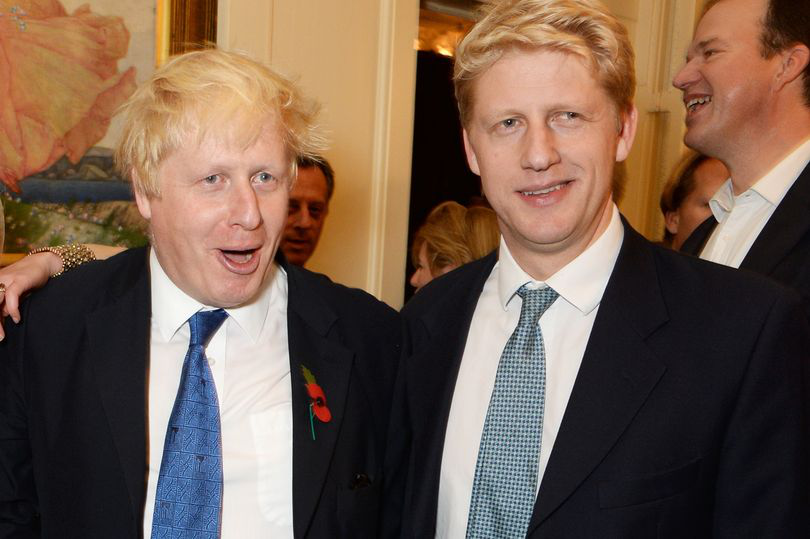

In [3]:
im = Image.open('bojo-jojo.jpg')
im

In [37]:
orig_arr = np.array(im)

In [45]:
mat = np.identity(3)
mat[1, 1] = 0.9
mat[2, 2] = 0.5
mat

array([[1. , 0. , 0. ],
       [0. , 0.9, 0. ],
       [0. , 0. , 0.5]])

In [87]:
arr = (orig_arr @ mat).astype('uint8')

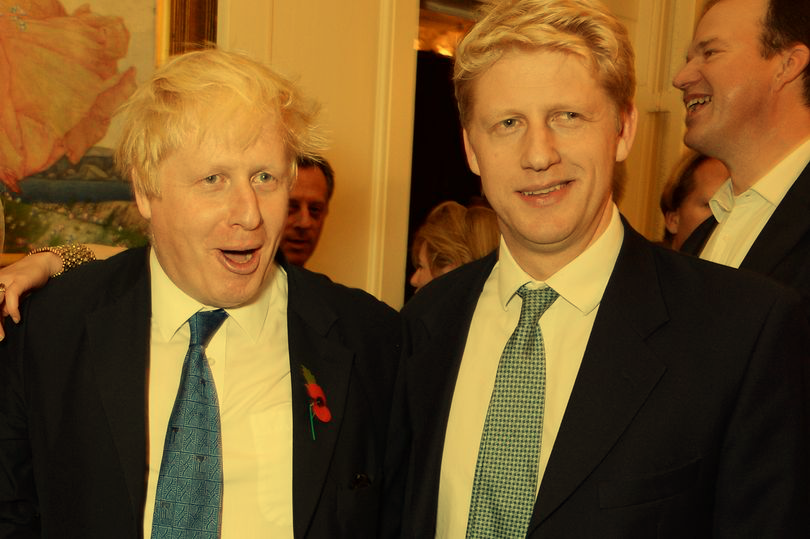

In [88]:
Image.fromarray(arr)

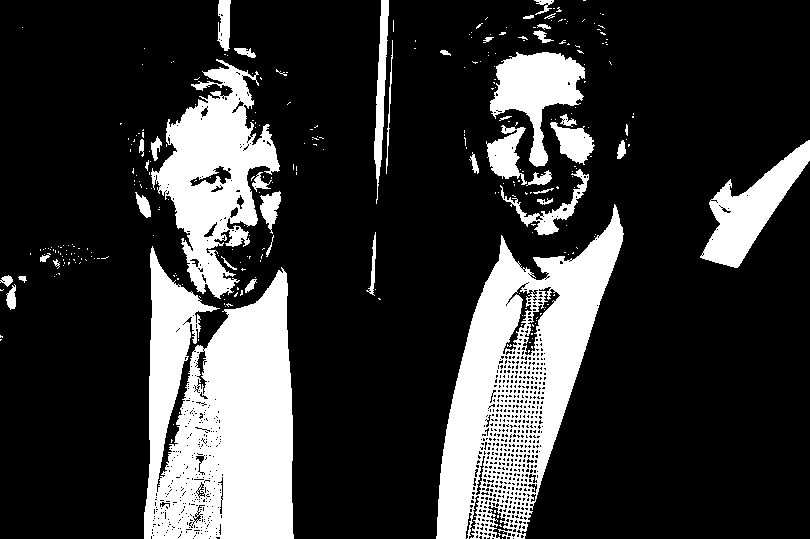

In [77]:
thold = (orig_arr[..., 2] > 128).astype('uint8') * 255
Image.fromarray(thold)

In [67]:
import scipy.ndimage as ndimage

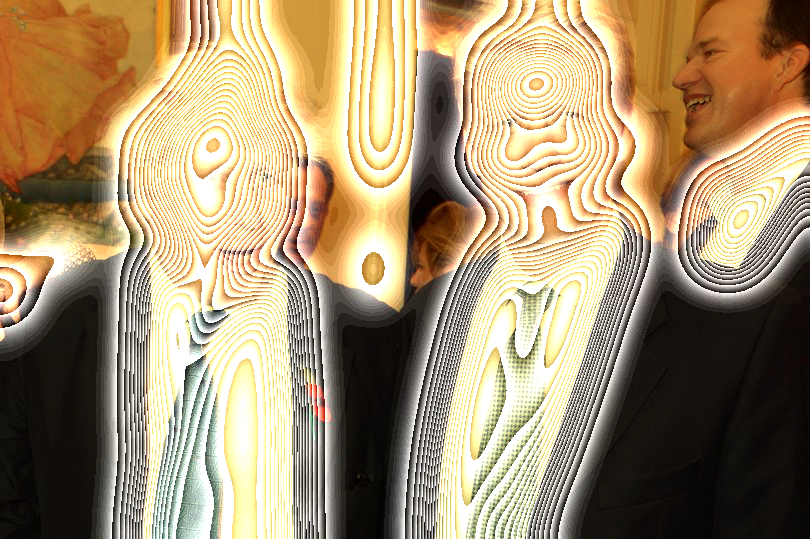

In [103]:
highlights = ndimage.gaussian_filter(thold, 20)

bloom = np.dstack([highlights * 20] * 3).astype('f4') + arr.astype('f4')

Image.fromarray(np.clip(bloom, 0, 255).astype('uint8'))

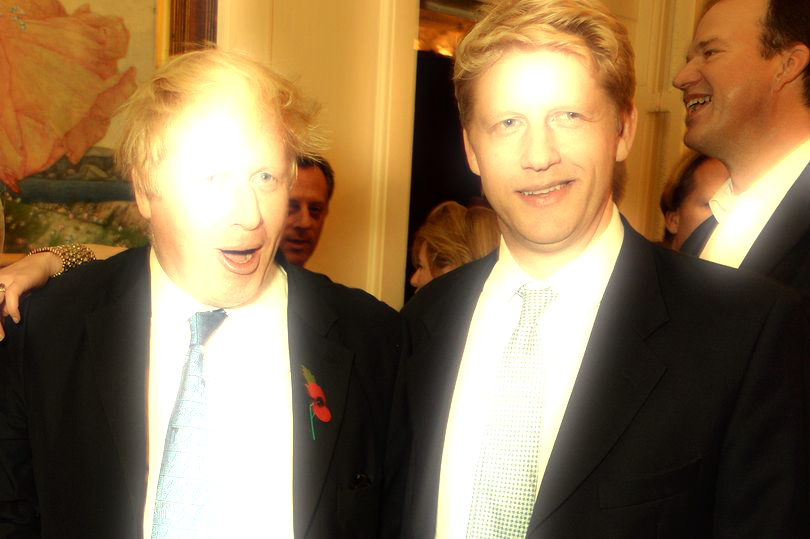

In [123]:
highlights = ndimage.gaussian_filter(thold, 20)

bloom = np.dstack([highlights] * 3).astype('f4') * 0.9 + arr.astype('f4')

Image.fromarray(np.clip(bloom, 0, 255).astype('uint8'))

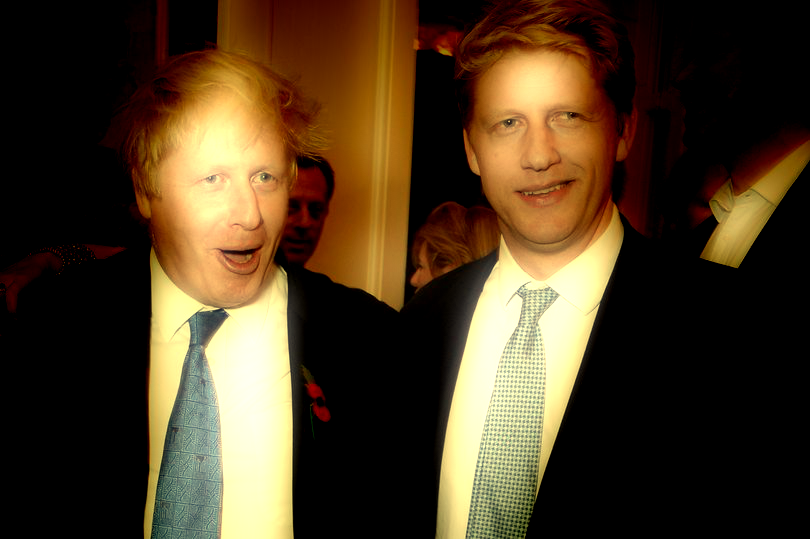

In [129]:
xs, ys = np.indices(orig_arr.shape[:2])

w, h, _ = orig_arr.shape

cx, cy = w * 0.5, h * 0.5

dist = ((cx - xs) ** 2 + (cy - ys) ** 2) ** 0.5

Image.fromarray(np.clip(bloom - 0.5 * np.dstack([dist] * 3), 0, 255).astype('uint8'))

In [134]:
orig_arr.T.shape

(3, 810, 539)